# Q1: Is there any pattern in the cast of the top 5 highest profitable movies

In [15]:
from importlib import reload

import sqlite3
import pandas as pd
import numpy as np
import helper_functions as hf


import matplotlib.pyplot as plt

import seaborn as sns

In [18]:
reload(hf)

<module 'helper_functions' from '/Users/rafael/flatiron-dsc/curriculum-v2-1/mod1_project/dsc-mod-1-project-v2-1-online-ds-ft-120919/helper_functions.py'>

# Jupyter Helper Functions

In [24]:
def preview_tables(conn, tables='all'):
    all_tables = hf.get_table_list(conn)
    if tables=='all':
        final_table_names = all_tables
        
    elif type(tables) == list:
        final_table_names = [t for t in all_tables if t in tables]
    
    for table_name in final_table_names:
        print(f"Showing Table: {table_name}")
        query = f"select * from {table_name};"
        df = pd.read_sql(query, conn)
        display(df.head(2))
        print("-"*100)
    print("finished")
    return None

In [25]:
conn = sqlite3.Connection("movies_db.sqlite")

In [26]:
table_names = hf.get_table_list(conn)
table_names

['tmdb_movies',
 'imdb_title_crew',
 'tn_movie_budgets',
 'imdb_title_ratings',
 'imdb_name_basics',
 'imdb_title_principals',
 'imdb_title_akas',
 'bom_movie_gross',
 'imdb_title_basics']

In [46]:
preview_tables(conn, tables='all')

Showing Table: tmdb_movies


,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"


----------------------------------------------------------------------------------------------------
Showing Table: tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


----------------------------------------------------------------------------------------------------
Showing Table: imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0


----------------------------------------------------------------------------------------------------
Showing Table: bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


----------------------------------------------------------------------------------------------------
finished


## Get top 5 highest grossing movies

### Condition Data First

In [35]:
tn_movie_budgets_df = hf.load_table(conn, "tn_movie_budgets")

In [36]:
tn_movie_budgets_df.shape

(5782, 6)

In [37]:
tn_movie_budgets_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [40]:
# convert dollars to integers
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    tn_movie_budgets_df = hf.convert_dollars_to_int(tn_movie_budgets_df, col)

In [41]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [42]:
tn_movie_budgets_df['budget_gross_diff'] = tn_movie_budgets_df['worldwide_gross'] - tn_movie_budgets_df['production_budget']
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


### Get top 5

In [45]:
tn_movie_budgets_df.sort_values(by='budget_gross_diff', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000


In [47]:
imdb_title_basics_df = hf.load_table(conn, table_name='imdb_title_basics')
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [52]:
tn_movie_budgets_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875


In [54]:
table_names

['tmdb_movies',
 'imdb_title_crew',
 'tn_movie_budgets',
 'imdb_title_ratings',
 'imdb_name_basics',
 'imdb_title_principals',
 'imdb_title_akas',
 'bom_movie_gross',
 'imdb_title_basics']

In [69]:
query = """SELECT tn.*, imdb.genres
           FROM tn_movie_budgets as tn
           LEFT JOIN imdb_title_basics as imdb
           ON tn.movie = imdb.primary_title"""

joined_df = pd.read_sql(query, conn)
joined_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",None


In [70]:
joined_df.shape, tn_movie_budgets_df.shape

((7221, 7), (5782, 7))

In [82]:
joined_df[joined_df['genres']!=joined_df['genres']]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",None
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",None
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",None
15,16,"May 4, 2007",Spider-Man 3,"$258,000,000","$336,530,303","$894,860,230",None
19,20,"Jul 15, 2009",Harry Potter and the Half-Blood Prince,"$250,000,000","$302,089,278","$935,213,767",None
...,...,...,...,...,...,...,...
7214,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644",None
7215,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900,None
7217,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",None
7218,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",None


In [91]:
all_genres = set()
for genres in joined_df['genres']:
    if genres:
        all_genres.update(genres)

In [90]:
joined_df['genres'] = joined_df['genres'].apply(lambda x: x.split(",") if x else x)
joined_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",[Horror]
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","[Action, Adventure, Fantasy]"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","[Action, Adventure, Sci-Fi]"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","[Action, Adventure, Sci-Fi]"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",None


In [93]:
all_genres # i'm going to make all of these keys with list values

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [100]:
for genre in all_genres:
    joined_df[genre] = np.zeros(shape=joined_df.shape[0])
                                
joined_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,Romance,Documentary,Music,...,History,Crime,War,Drama,Animation,Fantasy,Sport,Biography,Sci-Fi,Comedy
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",[Horror],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","[Action, Adventure, Fantasy]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","[Action, Adventure, Sci-Fi]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","[Action, Adventure, Sci-Fi]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",None,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
for index, row in joined_df.iterrows():
    if row['genres']:
        for genre in row['genres']:
            joined_df.loc[index, genre] = 1

joined_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,Romance,Documentary,Music,...,History,Crime,War,Drama,Animation,Fantasy,Sport,Biography,Sci-Fi,Comedy
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",[Horror],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","[Action, Adventure, Fantasy]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","[Action, Adventure, Sci-Fi]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","[Action, Adventure, Sci-Fi]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",None,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
all_genres = list(all_genres)
all_genres

['Romance',
 'Documentary',
 'Music',
 'Family',
 'Adventure',
 'Thriller',
 'Musical',
 'Western',
 'News',
 'Reality-TV',
 'Horror',
 'Action',
 'Mystery',
 'History',
 'Crime',
 'War',
 'Drama',
 'Animation',
 'Fantasy',
 'Sport',
 'Biography',
 'Sci-Fi',
 'Comedy']

### Investigating the genres of the top 5 highest grossing movies

In [146]:
top_5_budget_gross_diff_movies = tn_movie_budgets_df.sort_values(by='budget_gross_diff', ascending=False)['movie'][:50]
top_5_budget_gross_diff_movies


0                                              Avatar
42                                            Titanic
6                              Avengers: Infinity War
5                Star Wars Ep. VII: The Force Awakens
33                                     Jurassic World
66                                          Furious 7
26                                       The Avengers
260     Harry Potter and the Deathly Hallows: Part II
41                                      Black Panther
112                    Jurassic World: Fallen Kingdom
155                                            Frozen
134                              Beauty and the Beast
672                                           Minions
3                             Avengers: Age of Ultron
425     The Lord of the Rings: The Return of the King
43                                      Incredibles 2
47                                         Iron Man 3
4                   Star Wars Ep. VIII: The Last Jedi
135                         

In [147]:
genre_count = {}
for movie in top_5_budget_gross_diff_movies:
    movie_genres = joined_df[joined_df['movie']==movie]['genres'].values[0]
    try:
        for genre in movie_genres:
            genre_count[genre] = genre_count.get(genre, 0) + 1
    except:
        genre_count['not_listed'] = genre_count.get('not_listed', 0) + 1

genre_count
    

{'Horror': 1,
 'Adventure': 29,
 'Action': 19,
 'Sci-Fi': 12,
 'not_listed': 15,
 'Crime': 2,
 'Thriller': 4,
 'Animation': 11,
 'Comedy': 10,
 'Drama': 4,
 'Fantasy': 3,
 'Romance': 1,
 'Biography': 1,
 'Music': 1,
 'Family': 2}

In [148]:
genre_top_count_df = pd.DataFrame([genre_count])
genre_top_count_df.head(1)

,Horror,Adventure,Action,Sci-Fi,not_listed,Crime,Thriller,Animation,Comedy,Drama,Fantasy,Romance,Biography,Music,Family
0,1,29,19,12,15,2,4,11,10,4,3,1,1,1,2


### let's make a nice looking bar chart

In [150]:
values = []
labels = []

for genre, count in genre_count.items():
    labels.append(genre)
    values.append(count)

Text(0.5,1,'Genre Counts\nFor Top 50\nProfitable Movies')

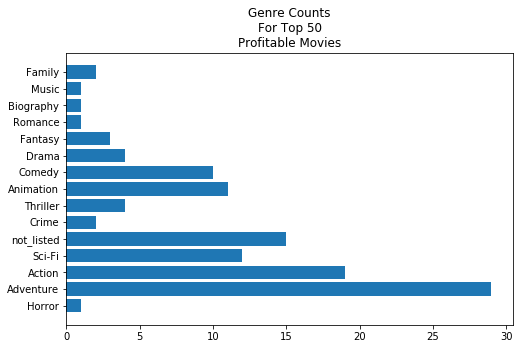

In [158]:
plt.figure(figsize=(8, 5))
plt.barh(labels, values)
plt.title("Genre Counts\nFor Top 50\nProfitable Movies")

### Insights/Findings/Recommendations

**Findings**

After examining the top 50 movies for gross/budget difference, I found that the most represented genres were *Adventures, Action and Sci-Fi*.  Of the top 50 movies, 15 movies did not have genre data available. The lowest represented genres were *Romance, Music, Biography, Horror*.  

**Recommendations**
* Collect genre information for all movies
* If creating a movie in the lowest performing genres, do not expect to gross over the budget.  
* If aiming at high gross, create action adventures movies.


**Next Steps**
* Plan on adding directors, actors, seasons to this data to see if anything else correlates with high performance.  
* If possible, gather missing movie information.